In [27]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium 
from folium.plugins import Search, FeatureGroupSubGroup, MeasureControl

atlantico = gpd.read_file("MAPAS/MGN_2/DPTO_CNMBR_ATLÁNTICO.shp")
atlantico = atlantico.rename(columns={'MPIO_CCNCT': 'COD_MUN','MPIO_CNMBR': 'NOM_MUN'})
atlantico = atlantico[['COD_MUN', 'NOM_MUN', 'MPM', 'geometry']]
print(atlantico.columns)


nuevas = gpd.read_file("MAPAS/NUEVAS/Vías Nuevas.shp")
print(nuevas.columns)

puntos = gpd.read_file("MAPAS/PUNTOS/Puntos.shp")
print(puntos.columns)

vias = gpd.read_file("MAPAS/VIAS/Linea.shp")
print(vias.columns)

Index(['COD_MUN', 'NOM_MUN', 'MPM', 'geometry'], dtype='object')
Index(['id', 'Nombre', 'Longitud (', 'geometry'], dtype='object')
Index(['name', 'folders', 'descriptio', 'altitude', 'alt_mode', 'time_begin',
       'time_end', 'time_when', 'Categoria', 'geometry'],
      dtype='object')
Index(['name', 'folders', 'descriptio', 'altitude', 'alt_mode', 'time_begin',
       'time_end', 'time_when', 'Categoria', 'geometry'],
      dtype='object')


<Axes: >

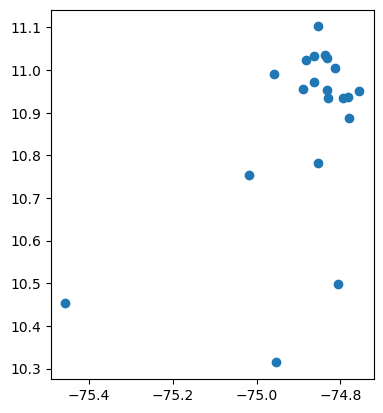

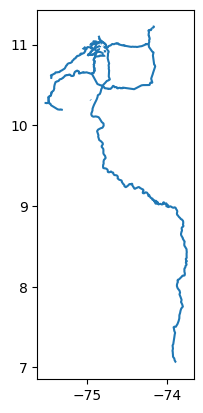

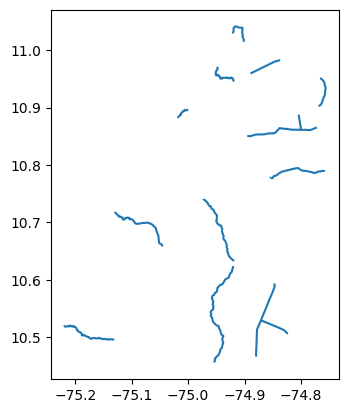

In [30]:
puntos.plot()
vias.plot()
nuevas.plot()


In [6]:
# Asegurarnos de que las geometrías estén en WGS84 (coordenadas lat/lon)
atlantico = atlantico.to_crs(epsg=32618)
vias = vias.to_crs(epsg=32618)
nuevas = nuevas.to_crs(epsg=32618)
puntos = puntos.to_crs(epsg=32618)


In [33]:
# Crear mapa base
centro = atlantico.geometry.centroid.union_all().centroid
m = folium.Map(location=[centro.y, centro.x],
               zoom_start=9,
               tiles='CartoDB positron',
               control_scale=True)

C:\Users\usuario\AppData\Local\Temp\ipykernel_24348\3046171319.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centro = atlantico.geometry.centroid.union_all().centroid


In [36]:
# ===== CAPA 1: MUNICIPIOS =====
muni_layer = folium.FeatureGroup(name='🏘️ Municipios', show=True)

folium.GeoJson(
    atlantico,
    style_function=lambda x: {
        'fillColor': '#e8f4f8',
        'color': '#2c7bb6',
        'weight': 2,
        'fillOpacity': 0.3
    },
    highlight_function=lambda x: {
        'weight': 4,
        'fillOpacity': 0.6
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['NOM_MUN', 'COD_MUN'],
        aliases=['Municipio:', 'Código:'],
        style="font-size: 12px;"
    ),
    name='Municipios'
).add_to(muni_layer)

muni_layer.add_to(m)

#show
m.save('try.html')

In [45]:
# CAPA 2: VÍAS PRINCIPALES
vias_layer = folium.FeatureGroup(name='Vías Principales', show=True)

folium.GeoJson(
    vias,
    style_function=lambda x: {
        'color': '#ff7800',
        'weight': 3
    },
    highlight_function=lambda x: {
        'weight': 5
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['descriptio', 'descriptio'],
        aliases=['Nombre de la Vía:', 'Tipo de Vía:'],
        style="font-size: 12px;"
    ),
    name='Vías Principales'
).add_to(vias_layer)

vias_layer.add_to(m)
#show
m.save('try_2.html')

AssertionError: The field NOMBRE_VIA is not available in the data. Choose from: ('name', 'folders', 'descriptio', 'altitude', 'alt_mode', 'time_begin', 'time_end', 'time_when', 'Categoria').

Index(['id', 'Nombre', 'Longitud (', 'geometry'], dtype='object')
Index(['name', 'folders', 'descriptio', 'altitude', 'alt_mode', 'time_begin',
       'time_end', 'time_when', 'Categoria', 'geometry'],
      dtype='object')
Index(['name', 'folders', 'descriptio', 'altitude', 'alt_mode', 'time_begin',
       'time_end', 'time_when', 'Categoria', 'geometry'],
      dtype='object')

In [10]:
vias.head()

,name,folders,descriptio,altitude,alt_mode,time_begin,time_end,time_when,Categoria,geometry
0,Ampliación Circunvalar,None,"<p class=""MsoNormal""><b>NOMBRE PROYECTO:&nbsp;...",0.0,absolute,None,None,None,Urbanismo y desarrollo metropolitano,"LINESTRING Z (517656.046 1212363.78 0, 517659...."
1,Ampliación 51B,None,None,0.0,absolute,None,None,None,Urbanismo y desarrollo metropolitano,"LINESTRING Z (513882.155 1218261.661 0, 514042..."
2,Ampliación CRA 38,None,"<p class=""MsoNormal""><b>NOMBRE PROYECTO:&nbsp;...",0.0,absolute,None,None,None,Urbanismo y desarrollo metropolitano,"LINESTRING Z (517852.639 1214076.886 0, 517827..."
3,Navegabilidad Río Magdalena,None,<p><b>NOMBRE PROYECTO:&nbsp;</b>Navegabilidad ...,0.0,absolute,None,None,None,Ambiental y Gestión de del territorio,"LINESTRING Z (623372.324 780633.677 0, 623042...."
4,Vía al Mar,None,"<p class=""MsoNormal""><b>NOMBRE PROYECTO:&nbsp;...",0.0,absolute,None,None,None,Transporte,"LINESTRING Z (450710.136 1168985.5 0, 450770.5..."


In [11]:
nuevas.head()

,id,Nombre,Longitud (,geometry
0,1,Sabanalarga - Usiacur,13.5,"LINESTRING (502929.631 1187296.121, 502931.25 ..."
1,3,Malambo-Caracolí-Cordialidad,14.1,"LINESTRING (511460.057 1199453.242, 511753.572..."
2,4,Sexta entrada - Prolongación Murillo,2.6,"LINESTRING (521817.27 1200668.96, 521817.178 1..."
3,2,Molinero - Hibácharo,13.5,"MULTILINESTRING ((487726.392 1183534.159, 4877..."
4,5,Cascajal - Leña,15.3,"LINESTRING (513200.267 1157005.45, 513193.303 ..."


In [13]:
puntos['Categoria'].unique()

array(['Ambiental y Gestión de del territorio', 'Transporte',
       'Social y cultural', 'Urbanismo y desarrollo metropolitano'],
      dtype=object)

In [12]:
puntos.head()

,name,folders,descriptio,altitude,alt_mode,time_begin,time_end,time_when,Categoria,geometry
0,Ubicación Arroyos Canalización,None,"<p class=""MsoNormal""><b>NOMBRE PROYECTO:&nbsp;...",7.236141,absolute,None,None,None,Ambiental y Gestión de del territorio,POINT Z (514897.084 1219529.234 7.236)
1,Ubicación Arroyos Canalización,None,"<p class=""MsoNormal""><b>NOMBRE PROYECTO:&nbsp;...",33.467010,absolute,None,None,None,Ambiental y Gestión de del territorio,POINT Z (512126.42 1211126.913 33.467)
2,Ubicación Arroyos Canalización,None,"<p class=""MsoNormal""><b>NOMBRE PROYECTO:&nbsp;...",72.509011,absolute,None,None,None,Ambiental y Gestión de del territorio,POINT Z (520390.702 1216662.115 72.509)
3,Ubicación Arroyos Canalización,None,"<p class=""MsoNormal""><b>NOMBRE PROYECTO:&nbsp;...",39.107417,absolute,None,None,None,Ambiental y Gestión de del territorio,POINT Z (522615.035 1208704.195 39.107)
4,Ubicación Arroyos Canalización,None,"<p class=""MsoNormal""><b>NOMBRE PROYECTO:&nbsp;...",48.620563,absolute,None,None,None,Ambiental y Gestión de del territorio,POINT Z (518645.471 1208668.966 48.621)


In [ ]:
# ===== CAPA 2: VÍAS EXISTENTES =====
if not vias.empty:
    vias_layer = folium.FeatureGroup(name='🛣️ Vías existentes', show=True)
    
    # Verificar si hay atributos de tipo de vía
    if 'tipo' in vias.columns or 'TIPO' in vias.columns:
        tipo_col = 'tipo' if 'tipo' in vias.columns else 'TIPO'
        tipos_vias = vias[tipo_col].unique()
        
        # Asignar colores por tipo
        colores_vias = {
            'Principal': '#000000',
            'Secundaria': '#636363',
            'Terciaria': '#969696',
            'Pavimentada': '#252525',
            'Sin pavimentar': '#bdbdbd'
        }
        
        for tipo in tipos_vias:
            vias_tipo = vias[vias[tipo_col] == tipo]
            color = colores_vias.get(tipo, '#636363')
            
            folium.GeoJson(
                vias_tipo,
                style_function=lambda x, color=color: {
                    'color': color,
                    'weight': 3 if tipo == 'Principal' else 2,
                    'opacity': 0.8
                },
                name=f'Vías {tipo}',
                tooltip=folium.GeoJsonTooltip(
                    fields=[tipo_col, 'nombre'] if 'nombre' in vias.columns else [tipo_col],
                    aliases=['Tipo:', 'Nombre:'] if 'nombre' in vias.columns else ['Tipo:']
                )
            ).add_to(vias_layer)
    else:
        # Sin clasificación
        folium.GeoJson(
            vias,
            style_function=lambda x: {
                'color': '#636363',
                'weight': 2.5,
                'opacity': 0.8
            },
            name='Vías existentes',
            tooltip=folium.GeoJsonTooltip(
                fields=['nombre'] if 'nombre' in vias.columns else [],
                aliases=['Nombre:'] if 'nombre' in vias.columns else []
            )
        ).add_to(vias_layer)
    
    vias_layer.add_to(m)


In [ ]:

# ===== CAPA 3: VÍAS NUEVAS =====
if not nuevas_atl.empty:
    nuevas_layer = folium.FeatureGroup(name='🚧 Vías nuevas', show=True)
    
    folium.GeoJson(
        nuevas_atl,
        style_function=lambda x: {
            'color': '#e31a1c',
            'weight': 4,
            'opacity': 0.9,
            'dashArray': '10, 10'
        },
        name='Vías nuevas',
        tooltip=folium.GeoJsonTooltip(
            fields=['nombre', 'estado'] if 'nombre' in nuevas_atl.columns else [],
            aliases=['Nombre:', 'Estado:'] if 'nombre' in nuevas_atl.columns else []
        )
    ).add_to(nuevas_layer)
    
    nuevas_layer.add_to(m)

# ===== CAPA 4: PUNTOS DE INTERÉS =====
if not puntos_atl.empty:
    puntos_layer = folium.FeatureGroup(name='📍 Puntos de interés', show=True)
    
    # Configurar iconos por tipo
    iconos_por_tipo = {
        'hospital': 'plus',
        'escuela': 'book',
        'estacion': 'train',
        'puerto': 'anchor',
        'aeropuerto': 'plane',
        'parque': 'tree',
        'centro': 'home'
    }
    
    # Verificar columnas disponibles
    tiene_nombre = 'nombre' in puntos_atl.columns or 'NOMBRE' in puntos_atl.columns
    nombre_col = 'nombre' if 'nombre' in puntos_atl.columns else 'NOMBRE' if 'NOMBRE' in puntos_atl.columns else None
    
    tiene_tipo = 'tipo' in puntos_atl.columns or 'TIPO' in puntos_atl.columns
    tipo_col = 'tipo' if 'tipo' in puntos_atl.columns else 'TIPO' if 'TIPO' in puntos_atl.columns else None
    
    for idx, row in puntos_atl.iterrows():
        # Obtener coordenadas
        if row.geometry.geom_type == 'Point':
            coords = [row.geometry.y, row.geometry.x]
        else:
            centro = row.geometry.centroid
            coords = [centro.y, centro.x]
        
        # Determinar tipo para icono
        if tiene_tipo:
            tipo = row[tipo_col].lower() if row[tipo_col] else 'info-sign'
            icono = iconos_por_tipo.get(tipo, 'info-sign')
        else:
            icono = 'info-sign'
            tipo = 'punto'
        
        # Texto del popup
        popup_text = f"<b>Punto de interés</b><br>"
        if tiene_nombre:
            popup_text += f"<b>Nombre:</b> {row[nombre_col]}<br>"
        if tiene_tipo:
            popup_text += f"<b>Tipo:</b> {row[tipo_col]}<br>"
        
        # Crear marcador
        folium.Marker(
            location=coords,
            popup=folium.Popup(popup_text, max_width=300),
            tooltip=row[nombre_col] if tiene_nombre else f"Punto {idx}",
            icon=folium.Icon(
                color='green' if tipo in ['hospital', 'escuela'] else 'blue',
                icon=icono,
                prefix='glyphicon'
            )
        ).add_to(puntos_layer)
    
    puntos_layer.add_to(m)

# ===== CONTROL DE CAPAS =====
folium.LayerControl(collapsed=False).add_to(m)

# ===== BARRA DE BÚSQUEDA =====
# Buscar en municipios
search_muni = Search(
    layer=muni_layer,
    search_label='MPIO_CNMBR',
    placeholder='Buscar municipio...',
    collapsed=True,
    position='topleft'
).add_to(m)

# ===== MEDIDAS =====
MeasureControl().add_to(m)

# ===== TÍTULO PERSONALIZADO =====
title_html = '''
<div style="
    position: fixed; 
    top: 10px; 
    left: 50%; 
    transform: translateX(-50%);
    z-index: 1000; 
    background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
    padding: 15px 30px;
    border-radius: 10px;
    border: 3px solid white;
    box-shadow: 0 4px 20px rgba(0,0,0,0.3);
    color: white;
    font-family: Arial, sans-serif;
    text-align: center;
">
    <h2 style="margin:0; font-size:22px;">🗺️ SISTEMA VIAL DEL ATLÁNTICO</h2>
    <p style="margin:5px 0 0 0; font-size:14px; opacity:0.9;">
        Activa/desactiva capas usando el control superior derecho
    </p>
</div>
'''
m.get_root().html.add_child(folium.Element(title_html))

# ===== LEYENDA PERSONALIZADA =====
legend_html = '''
<div style="
    position: fixed; 
    bottom: 50px; 
    left: 20px; 
    z-index: 1000;
    background: white;
    padding: 15px;
    border-radius: 8px;
    border: 2px solid #2c7bb6;
    box-shadow: 0 0 15px rgba(0,0,0,0.2);
    font-size: 12px;
    max-width: 220px;
">
    <h4 style="margin-top:0; color:#2c7bb6;">🎨 Leyenda de colores</h4>
    <div style="display:flex; align-items:center; margin:5px 0;">
        <div style="width:20px; height:3px; background:#636363; margin-right:10px;"></div>
        <span>Vías existentes</span>
    </div>
    <div style="display:flex; align-items:center; margin:5px 0;">
        <div style="width:20px; height:3px; background:#e31a1c; margin-right:10px; border-style: dashed;"></div>
        <span>Vías nuevas</span>
    </div>
    <div style="display:flex; align-items:center; margin:5px 0;">
        <div style="width:15px; height:15px; background:#2ca25f; border-radius:50%; margin-right:10px;"></div>
        <span>Puntos de interés</span>
    </div>
    <hr style="margin:10px 0;">
    <p><small>💡 <b>Interactividad:</b></small></p>
    <p><small>• <b>Click</b> en elementos para detalles</p>
    <p>• <b>Scroll</b> para zoom</p>
    <p>• <b>Ctrl+Click</b> para arrastrar</small></p>
</div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

# Guardar mapa
m.save('Atlantico_Capas_Interactivo.html')
print("✅ Mapa interactivo guardado como 'Atlantico_Capas_Interactivo.html'")